# Problem Statement- 1

## Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application

2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4. Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Data Understanding

The dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## Process Flow: 

#### We will take our "application_data.csv" dataset into the account first and start working on it as per the process flow below:

1. We will first clean up the "application_data.csv" dataset.
Note: Cleaning means, we will first remove the duplicate rows and then, we will correct its data types if required. With that, we will try merging the columns to generate a meaningful columns if required and create new meaningful attributes from a column if required. For ex; day, year and month from date column.

2. We will drop the columns having null value %ge more than 40%. But, before doing that we will have a check on those columns' list first, so that we can make sure we are not dropping any important column which may affect our analysis.

3. We will perform univariate, bivariate and segmented univariate analysis on all the important columns and try to find out how much they are influencing our target variable.

Note: The target variable is our "TARGET" column in the "application_data.csv" dataset which tells if the loans are approved or not. Also, we will make sure Target variable has binary entry only. 1 for Those who are defaulters and 0 for those who are not the defaulters.


### Importing all the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets assign 'application_data.csv' into variable 'df'.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df= pd.read_csv(r'C:\Users\deepa\Desktop\Mysql installer\Credit EDA Assignment\application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
df.shape

(307511, 122)

In [3]:
#Checking if the data is having complete duplicate rows or not. If Yes, then how many?
df.duplicated().sum()

0

In [6]:
#Lets check the same for "SK_ID_CURR" column as well if there is any duplicate entry with that id.
df.duplicated(subset = 'SK_ID_CURR').sum()

0

In [7]:
#Since there is no duplicate rows, we are going to the next step of data cleaning.
#Lets look at the df1 info with (verbose=True) since they have a large set of columns.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [68]:
## The data seems to have a large set of columns so, lets try to eliminate those set of data which has Null value~40% ormore.
#checking for the null value counts in each column
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [69]:
#Calculating the percentage null values in each column
(df.isnull().sum()/df.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

Before deleting the data, it is important to check if the data that we are going to drop is not affecting our analysis.
- Lets have a look to those data which has null count %ge more than 40%. 
- After that, we will refer to the dictionary description of each of those column before dropping them from the data set.

In [18]:
((df.isnull().sum()/df.shape[0])*100>40.0).sum() #Gives total no. of columns which has null values more than 40%.

49

In [70]:
(df.isnull().sum()/df.shape[0])*100>40.0

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

In [3]:
#We will check the the list of those columns who has null values more than 40%, so that we are sure before dropping them.
Bool= (df.isnull().sum()/df.shape[0])*100>40.0
na_columns= [df.columns[i] for i in np.where(Bool)[0]]
na_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [4]:
print(len([df.columns[i] for i in np.where(Bool)[0]]))

49


In [5]:
#An alternate way to check those columns who has null values more than 40%, so that we are sure before dropping them.
list(((df.isnull().sum()/df.shape[0])*100>40.0)[(df.isnull().sum()/df.shape[0])*100>40.0].index)

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [4]:
#After having a look above, we can go ahead and drop the above columns since they don't seem to be afecting our analysis.
df.drop(labels= na_columns, axis=1, inplace=True)

In [5]:
df.shape #(To check if the columns are dropped successfully)

(307511, 73)

**We will now go ahead and check if each column is in the correct data type. 

In [11]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

Since, I could feel the dataset has still too many attributes left, it is not an ideal way to first check the data type of each an every columns before we start our analysis. We will rather pick 5 set of most important variables as per our understanding. We will check if they are in the correct data type format and then start our analysis with respect to our Target variable which is the "TARGET" column.
This way we are going to pick 20 to 25 set of important variables and we will perform univariate analysis first.

Before I proceed further, let me have a look on my TARGET column iself and plot a graph over it.

In [31]:
df.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

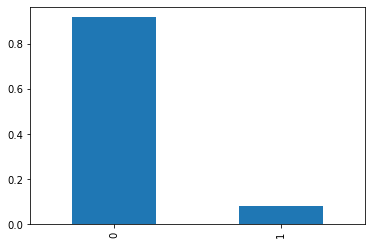

In [33]:
df.TARGET.value_counts(normalize=True).plot.bar()
plt.show()

- The data suggests that almost 8% of the people are defaulters.

Lets proceed further and do some more analysis to get more insights on the kind of applicants and the trends they have been following.
To start with, lets pick our first 5 set of variables as "CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL" and check their datatypes.

In [33]:
df[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL']].dtypes

CODE_GENDER          object
FLAG_OWN_CAR         object
FLAG_OWN_REALTY      object
CNT_CHILDREN          int64
AMT_INCOME_TOTAL    float64
dtype: object

Since the data type looks aboslutely fine, lets start our unvariate analysis.

In [34]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

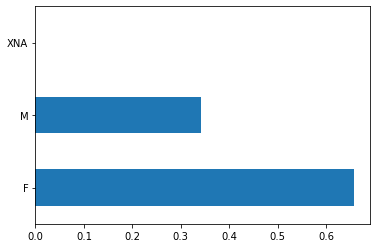

In [36]:
#plotting the bar for each gender type who have applied for the loan.
df.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

- This concludes female population is significantly high in terms of loan application.

In [37]:
df.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

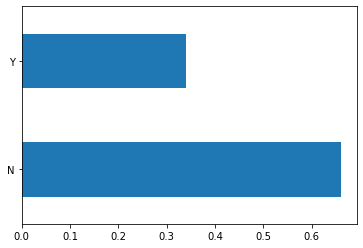

In [38]:
#plotting the bar to check if the applicants own a car or not.
df.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.show()

- This concludes the population which doesn't own a car is significantly high in terms of loan application.

In [39]:
df.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

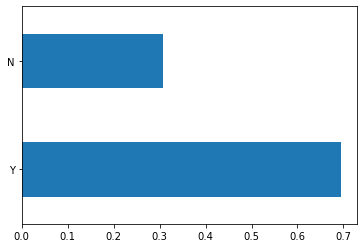

In [40]:
#plotting the bar to check if the applicants own a real estate property or not.
df.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.show()

- This concludes the population which owns a real estate property is significantly high in terms of loan application.

In [122]:
df.CNT_CHILDREN.value_counts(normalize=True)

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

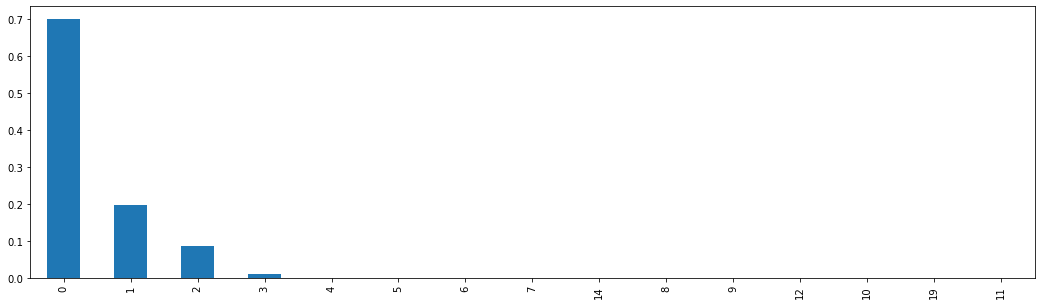

In [125]:
plt.figure(figsize=[18,5])
df.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.show()

- This concludes: Amongst the applicants, almost 70% of the population doesn't have any child and almost 20% have single child.

In [61]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Since AMT_INCOME_TOTAL column has values in float, it might not give us an easy to understand insights. I am rather going to convert this column to an integer type since, this won't affect our analysis going further and would rather simplify it more.

In [6]:
df.AMT_INCOME_TOTAL= df.AMT_INCOME_TOTAL.astype('int64')

In [7]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.AMT_INCOME_TOTAL= df.AMT_INCOME_TOTAL.abs()

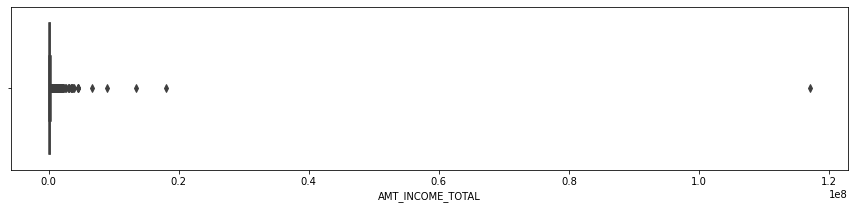

In [10]:
plt.figure(figsize=[15,3])
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

- In AMT_INCOME_TOTAL only single high value data point is present as an outlier. 
- Also concludes, people with lower(lowest) income are most likely to apply for a loan.

Lets pick our next 5 set of variables as "NAME_CONTRACT_TYPE, AMT_CREDIT, AMT_ANNUITY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE" and check their datatypes.

In [75]:
df[['NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']].dtypes

NAME_CONTRACT_TYPE      object
AMT_CREDIT             float64
AMT_ANNUITY            float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
dtype: object

Since Data types seems to be correct for the selected columns, we will proceed further with our analysis.

In [76]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

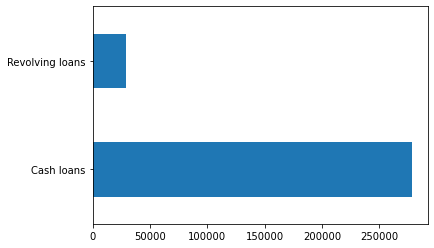

In [77]:
df.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

- People taking cash loans seems to apply more for a loan as per the plotted bar above.

In [79]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [8]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.AMT_CREDIT= df.AMT_CREDIT.abs()

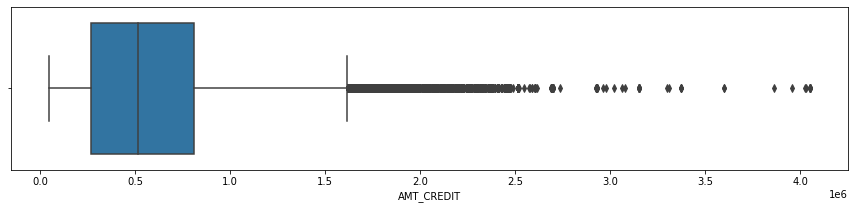

In [88]:
plt.figure(figsize=[15,3])
sns.boxplot(df.AMT_CREDIT)
plt.show()

- This reflects, majority of the people or say (50%) of the population who apply for loan are getting approved for the loan amount between 2.5L to 5.0L.

In [89]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [9]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.AMT_ANNUITY= df.AMT_ANNUITY.abs()

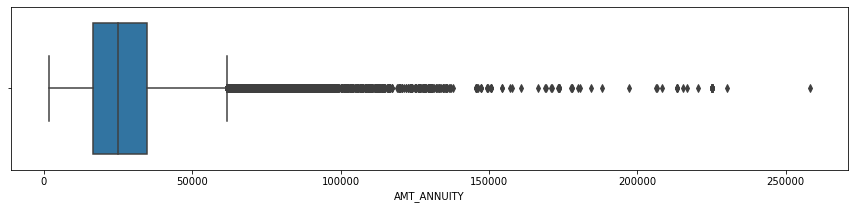

In [91]:
plt.figure(figsize=[15,3])
sns.boxplot(df.AMT_ANNUITY)
plt.show()

- This concludes 50% of the applicants have annuity amount between 15K to 35K. However, the number of applicants significantly increases in the department where annuity is somewhat more than 60-65K.


In [93]:
df.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

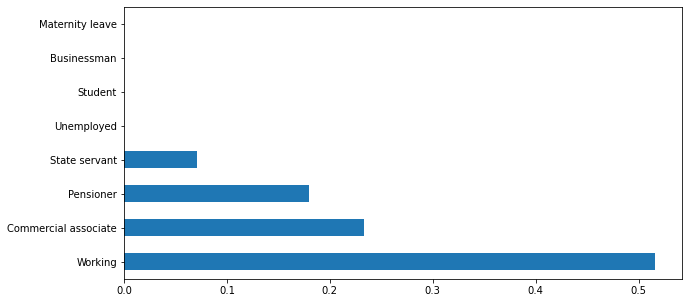

In [96]:
plt.figure(figsize=[10,5])
df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- We can clearly see which income category has the most number of applicants and come to the conclusion that people who have a source of income are most likely to apply for a loan. However, the set of people who probably have the best source of income i.e. Businessmen are least likely to apply for a loan.

In [100]:
df.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

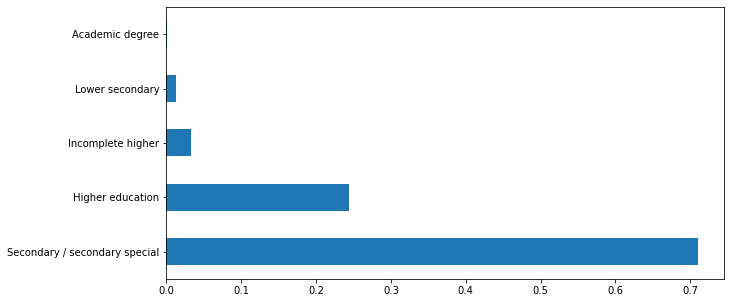

In [101]:
plt.figure(figsize=[10,5])
df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- This concludes, more educated people are more likely to apply for a loan.

Lets pick our next 5 set of variables as "NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION" and check their datatypes.

In [102]:
df[['NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']].dtypes

NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
dtype: object

In [103]:
df.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

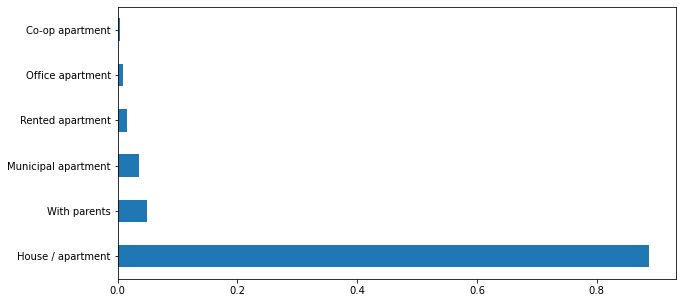

In [105]:
plt.figure(figsize=[10,5])
df.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- Here we may conclude that people having their own houses and apartments are most likely to apply for a loan.
- We may also have a look over the categories as well and figure out how likely they are to apply for a loan.

In [10]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.DAYS_BIRTH= df.DAYS_BIRTH.abs()

It will look more meaningful if we divide our DAYS_BIRTH column by 365 to convert the age into years.

In [11]:
df.DAYS_BIRTH= df.DAYS_BIRTH/365
df.DAYS_BIRTH= df.DAYS_BIRTH.apply(np.floor) #Function I'm using to round the decimal places to 0.

In [15]:
df.DAYS_BIRTH.head()

0    25.0
1    45.0
2    52.0
3    52.0
4    54.0
Name: DAYS_BIRTH, dtype: float64

In [112]:
df.DAYS_BIRTH.dtypes

dtype('float64')

In [12]:
#Lets convert the age into integers before we proceed with further analysis.
df.DAYS_BIRTH= df.DAYS_BIRTH.astype('int64')
df.DAYS_BIRTH.head()

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int64

In [17]:
df.DAYS_BIRTH.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

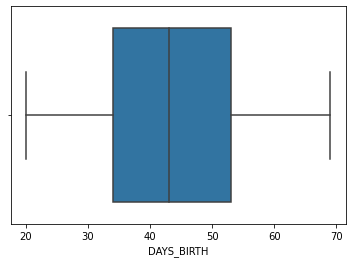

In [118]:
sns.boxplot(df.DAYS_BIRTH)
plt.show()

- This concludes 50% of the people's age lie within the range of 34 to 53 yrs. Also, 75% of the oeople who apply for the loan are below 53 yrs.

In [13]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.DAYS_EMPLOYED= df.DAYS_EMPLOYED.abs()

In [14]:
df.DAYS_EMPLOYED= df.DAYS_EMPLOYED/365

In [149]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

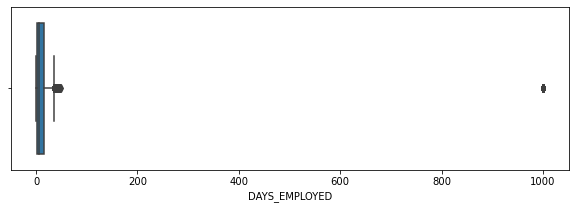

In [146]:
plt.figure(figsize=[10,3])
sns.boxplot(df.DAYS_EMPLOYED)
plt.show()

**Since it doesn't look much informative as it contains some unreal values in the column. So, to have a beter insight lets take few quantile values till 80 percentile.

In [154]:
df.DAYS_EMPLOYED.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]).describe()

count     8.000000
mean      7.789041
std       7.892453
min       1.073973
25%       2.839041
50%       5.227397
75%       9.267808
max      25.172603
Name: DAYS_EMPLOYED, dtype: float64

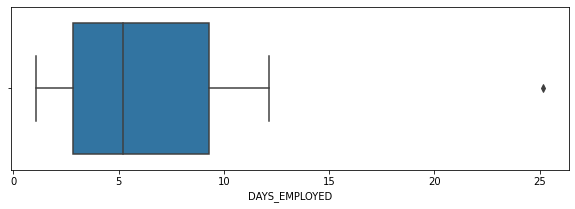

In [148]:
plt.figure(figsize=[10,3])
sns.boxplot(df.DAYS_EMPLOYED.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]))
plt.show()

- Here we can easily conclude that almost 50% of the population within the range who have been working for more than 2.5yrs and less than 10 years. 
- Also, people working for more than 12 years seem less likely to apply for a loan and same goes with people working for less than an year.

In [15]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.DAYS_REGISTRATION= df.DAYS_REGISTRATION.abs()

In [16]:
df.DAYS_REGISTRATION= df.DAYS_REGISTRATION/365

In [163]:
df.DAYS_REGISTRATION.describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

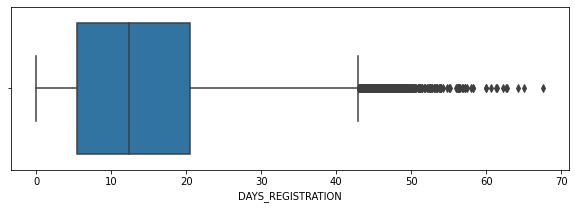

In [165]:
plt.figure(figsize=[10,3])
sns.boxplot(df.DAYS_REGISTRATION)
plt.show()

- 50% of the people who applied for the loan have done the registration within the range of (5.5 yrs to 20) yrs ago.
- Kindly ignore the outliers, though we can certainly see a significant rise in number of applicants who have spent more than 42 yrs since the time of registration which is most likely seems to be a bit unreal.

Lets pick our last 9 set of variables as "DAYS_ID_PUBLISH, FLAG_EMP_PHONE, FLAG_MOBIL, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT_W_CITY" and check their datatypes.

In [174]:
df[['DAYS_ID_PUBLISH','FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY']].dtypes

DAYS_ID_PUBLISH                float64
FLAG_EMP_PHONE                   int64
FLAG_MOBIL                       int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT_W_CITY      int64
dtype: object

In [17]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df.DAYS_ID_PUBLISH= df.DAYS_ID_PUBLISH.abs()

In [18]:
df.DAYS_ID_PUBLISH= df.DAYS_ID_PUBLISH/365

In [170]:
df.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

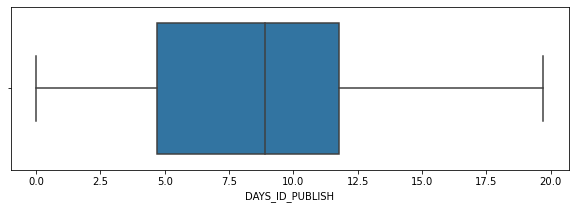

In [171]:
plt.figure(figsize=[10,3])
sns.boxplot(df.DAYS_ID_PUBLISH)
plt.show()

- We may conclude that 50% of the population issued a new id to apply for the loan approximately 5 to 12 yrs ago.
- There is no applicant whose id was issued 20 yrs ago or beyond.

**From here on there will be total of 5 Flag columns which is categorised in two enties "1" and "0" with "1" being "YES" and "0" being "NO".

In [176]:
df.FLAG_EMP_PHONE.value_counts(normalize=True)

1    0.819889
0    0.180111
Name: FLAG_EMP_PHONE, dtype: float64

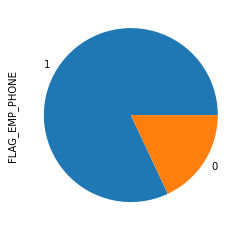

In [177]:
df.FLAG_EMP_PHONE.value_counts(normalize=True).plot.pie()
plt.show()

- Majority of the population who applied for the loan have shared their work phone number.

In [178]:
df.FLAG_MOBIL.value_counts(normalize=True)

1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64

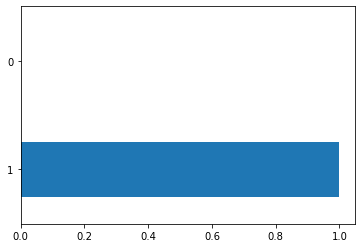

In [181]:
df.FLAG_MOBIL.value_counts(normalize=True).plot.barh()
plt.show()

- This is the most expected oucome. Those who are applying for a loan must have shared the mobile number.

In [182]:
df.FLAG_CONT_MOBILE.value_counts(normalize=True)

1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64

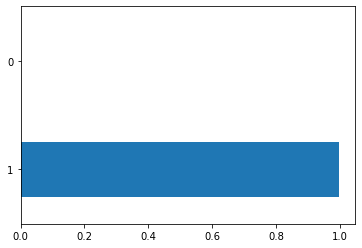

In [183]:
df.FLAG_CONT_MOBILE.value_counts(normalize=True).plot.barh()
plt.show()

- Again the most likely outcome. Almost all the phone numbers shared by the applicants are reachable.

In [184]:
df.FLAG_PHONE.value_counts(normalize=True)

0    0.718934
1    0.281066
Name: FLAG_PHONE, dtype: float64

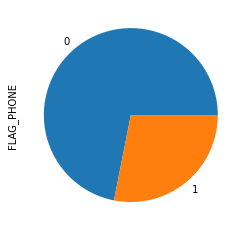

In [185]:
df.FLAG_PHONE.value_counts(normalize=True).plot.pie()
plt.show()

- Here is an interesting outcome. Almost 70% of the population haven't provided the home phone number.

In [186]:
df.FLAG_EMAIL.value_counts(normalize=True)

0    0.94328
1    0.05672
Name: FLAG_EMAIL, dtype: float64

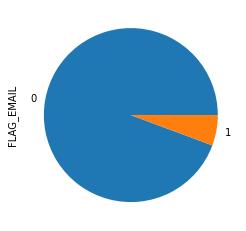

In [187]:
df.FLAG_EMAIL.value_counts(normalize=True).plot.pie()
plt.show()

- Again an interesting outcome. Almost 95% of the applicants haven't shared there email id with the bank.

In [188]:
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

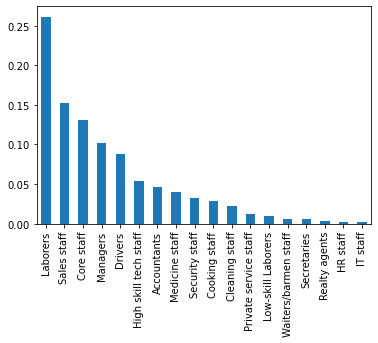

In [189]:
df.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

- We can have a detailed look here and figure out that people from which occupation goes for the loan more often.

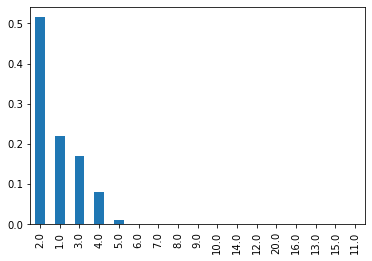

In [192]:
df.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.bar()
plt.show()

- A family of two is most likely to apply for the loan. 
- Also, the trend suggests, higher the count of family members is indirectly propotion to the possibility that people will apply for a loan. Only the first 2 bars are exceptions.

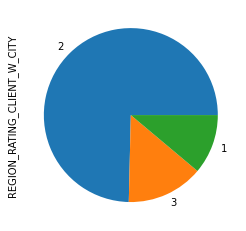

In [193]:
df.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.pie()
plt.show()

- Applicants are most likely from the cities which are rated as "2" say, "Medium" rated.
- Then comes the applicants from "3" rated cities say, "Highest" rated.
- Applicants from lower rated cities are also somewhat low.

### Now, we will do some bivariate analysis based on few of the above columns and try to figure out the trends among them. Also, we will end with a set of segmented univariate analysis to show some trends between our TARGET column and some set of categorical variables.

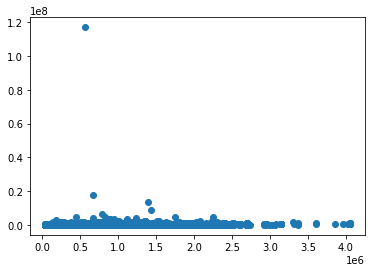

In [194]:
#plot the scatter plot of AMT_INCOME_TOTAL and AMT_CREDIT variable in df.
plt.scatter(df.AMT_CREDIT, df.AMT_INCOME_TOTAL)
plt.show()

- It doesn't show any strong correlation. Probably that analysis wouldn't help us to figure out anything good out of it.

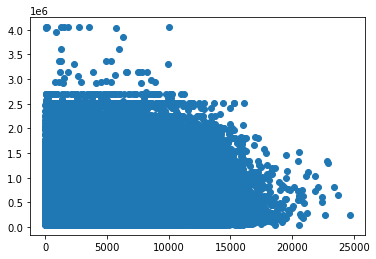

In [195]:
#plot the scatter plot of DAYS_BIRTH and AMT_CREDIT variable in df.
plt.scatter(df.DAYS_BIRTH, df.AMT_CREDIT)
plt.show()

- This graph is also not showing any kind of pattern and therefore, it is also doesn't help us to figure out anything good out of it.

We will try to check if there is any correlation between the above three variables with the help of heatmap.

In [196]:
df[['DAYS_BIRTH','AMT_CREDIT','AMT_INCOME_TOTAL']].corr()

,DAYS_BIRTH,AMT_CREDIT,AMT_INCOME_TOTAL
DAYS_BIRTH,1.000000,-0.009621,-0.027805
AMT_CREDIT,-0.009621,1.000000,0.156870
AMT_INCOME_TOTAL,-0.027805,0.156870,1.000000


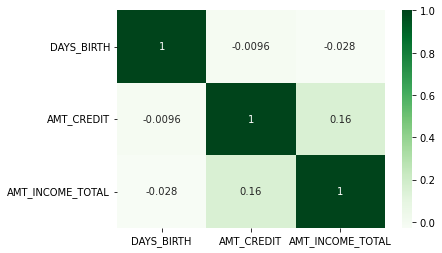

In [202]:
sns.heatmap(df[['DAYS_BIRTH','AMT_CREDIT','AMT_INCOME_TOTAL']].corr(), annot=True, cmap= 'Greens')
plt.show()

- Here we can see there is no strong correlation among these 3 variables.

Lets try to analyse some of the numerical columns grouping by our Target variable which is 'TARGET'.

**Note: In target variable, there are only two values assigned. "1" refers to clients with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample i.e. DEFAULTERS and, '0' refers to all the other cases i.e. NON-DEFAULTERS) 

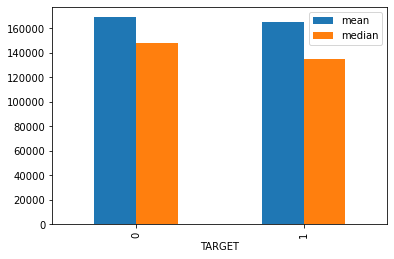

In [209]:
# Lets plot the bar graph of AMT_INCOME_TOTAL's mean an median with TARGET.

df.groupby('TARGET')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.show()

- We can't figure out much with this since, there is not much difference between the bars. However, it suggests people with lower income are a bit more likely to default.

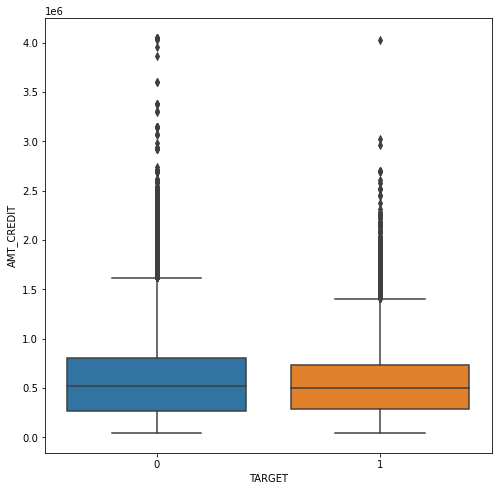

In [214]:
# Lets plot a box plot of AMT_CREDIT for TARGET.
plt.figure(figsize=[8,8])
sns.boxplot(data= df, x= 'TARGET', y= 'AMT_CREDIT')
plt.show()

- Here again we don't get too much of an insight. But, we can say a customores is less likely to default in case he has applied for a credit within the lowest and the highest range.

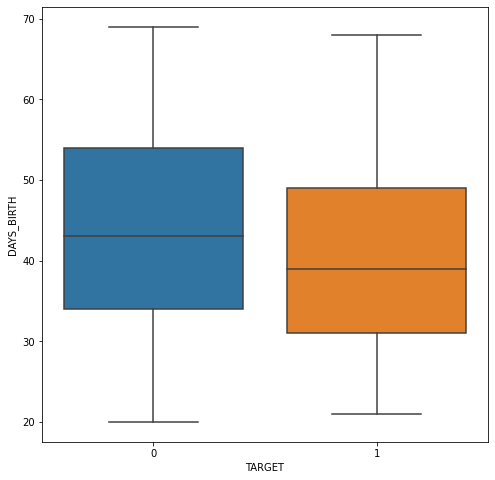

In [24]:
#Lets check the same with respect to the DAYS_BIRTH variable now.
plt.figure(figsize=[8,8])
sns.boxplot(data= df, x= 'TARGET', y= 'DAYS_BIRTH')
plt.show()

In [77]:
#creating the buckets of <30, 30-40, 40-50 50-60 and 60+ from DAYS_BIRTH column. 
#Here I have taken last entry as 1000 yrs since there are already entries for 1000 yrs in the column 
#despite of the fact that such entries are unreal.
df['age_group']= pd.cut(df.DAYS_BIRTH[:5], [0,30,40,50,60,1000], labels=['<30','30-40','40-50','50-60','60+'])

In [67]:
df.age_group.value_counts(normalize=True)

50-60    0.6
<30      0.2
40-50    0.2
30-40    0.0
60+      0.0
Name: DAYS_BIRTH, dtype: float64

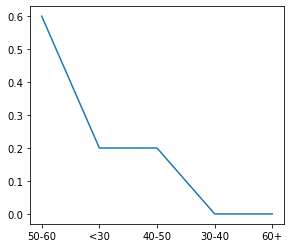

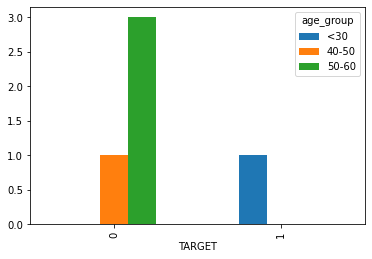

In [85]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df.age_group.value_counts(normalize=True).plot()
pd.crosstab(index=df['TARGET'], columns=df['age_group']).plot.bar()
plt.show()

- Here, we can say that people within the least age range and people with higher age range are less likely to default in an overall comparison.
- People under 30 yrs of age are very likely to default.

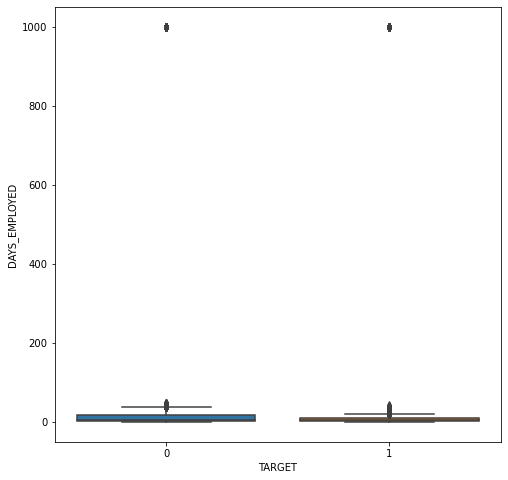

In [25]:
#Lets check the same with respect to the DAYS_EMPLOYED variable now.
plt.figure(figsize=[8,8])
sns.boxplot(data= df, x= 'TARGET', y= 'DAYS_EMPLOYED')
plt.show()

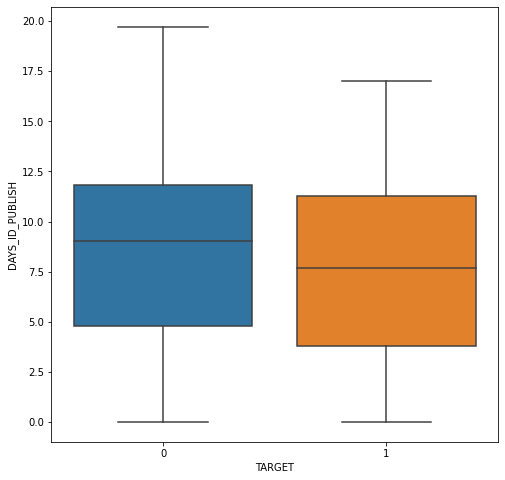

In [26]:
#Lets check the same with respect to the DAYS_EMPLOYED variable now.
plt.figure(figsize=[8,8])
sns.boxplot(data= df, x= 'TARGET', y= 'DAYS_ID_PUBLISH')
plt.show()

- Here we can say that people who are more likely to default are those who have recently changed the identity document.

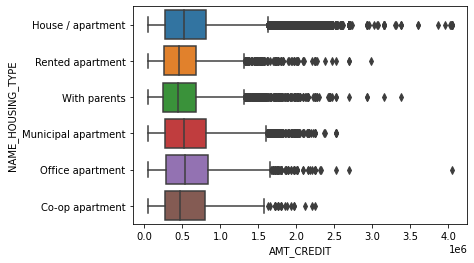

In [36]:
#Lets plot a boxplot to check which housing category gets what amount of loan credited.
sns.boxplot(data= df, x= 'AMT_CREDIT', y= 'NAME_HOUSING_TYPE')
plt.show()

Now, lets draw some plots between our TARGET column and some categorical variables.

In [37]:
#Lets plot a barplot between our TARGET column and NAME_HOUSING_TYPE column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['NAME_HOUSING_TYPE'])

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
TARGET,,,,,,
0,1033,251596,10228,2445,4280,13104
1,89,21272,955,172,601,1736


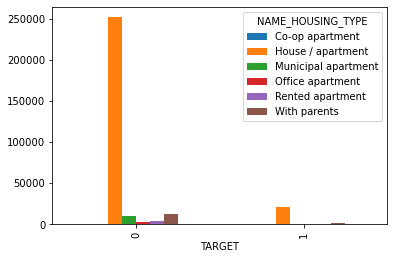

In [50]:
pd.crosstab(index=df['TARGET'], columns=df['NAME_HOUSING_TYPE']).plot.bar()
plt.show()

<AxesSubplot:ylabel='TARGET'>

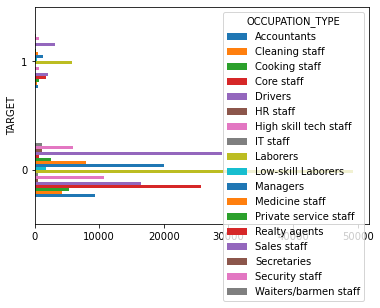

In [53]:
#Lets now plot a barplot between our TARGET column and OCCUPATION_TYPE column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['OCCUPATION_TYPE']).plot.barh()

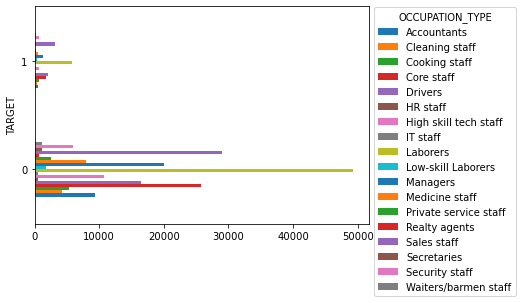

In [54]:
#I'm going to place the legend to a suitable place so that the picture looks clear.
pd.crosstab(index=df['TARGET'], columns=df['OCCUPATION_TYPE']).plot.barh().legend(title='OCCUPATION_TYPE', bbox_to_anchor=(1, 1.02), loc= 'upper left')
plt.show()

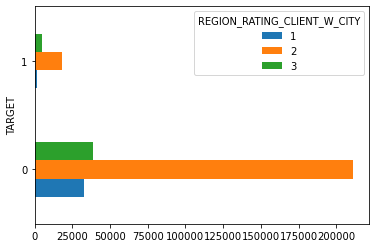

In [57]:
#Lets now plot a barplot between our TARGET column and REGION_RATING_CLIENT_W_CITY column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['REGION_RATING_CLIENT_W_CITY']).plot.barh()
plt.show()

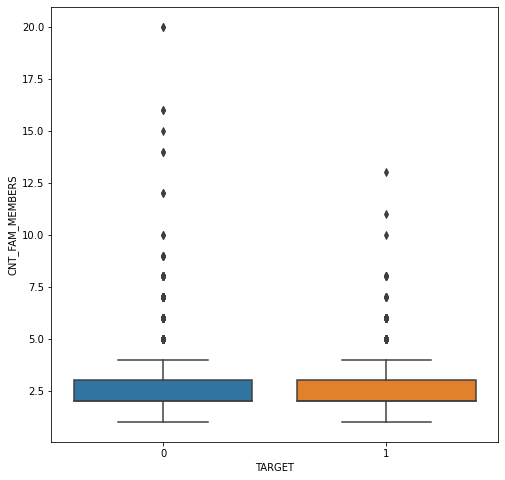

In [59]:
#Lets now plot a boxplot between our TARGET column and CNT_FAM_MEMBERS column to observe the trends they are following.
plt.figure(figsize=[8,8])
sns.boxplot(data= df, x= 'TARGET', y= 'CNT_FAM_MEMBERS')
plt.show()

- The data looks almost the same for the same count of family members in both the categories in the TARGET column.

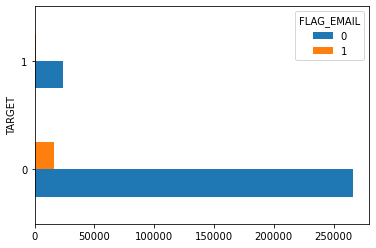

In [60]:
#Lets now plot a barplot between our TARGET column and FLAG_EMAIL column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['FLAG_EMAIL']).plot.barh()
plt.show()

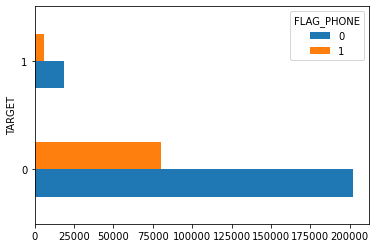

In [109]:
#Lets now plot a barplot between our TARGET column and FLAG_PHONE column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['FLAG_PHONE']).plot.barh()
plt.show()

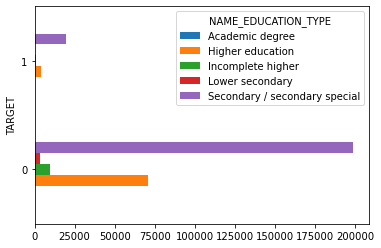

In [62]:
#Lets now plot a barplot between our TARGET column and NAME_EDUCATION_TYPE column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['NAME_EDUCATION_TYPE']).plot.barh()
plt.show()

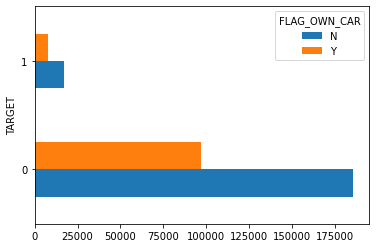

In [63]:
#Lets now plot a barplot between our TARGET column and FLAG_OWN_CAR column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['FLAG_OWN_CAR']).plot.barh()
plt.show()

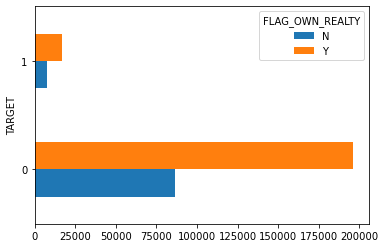

In [64]:
#Lets now plot a barplot between our TARGET column and FLAG_OWN_REALTY column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['FLAG_OWN_REALTY']).plot.barh()
plt.show()

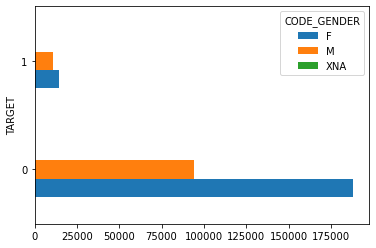

In [65]:
#Lets now plot a barplot between our TARGET column and CODE_GENDER column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df['CODE_GENDER']).plot.barh()
plt.show()

## Moving on to the next dataset now

In [19]:
#Lets assign 'previous_application.csv' into variable 'df0'.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df0= pd.read_csv(r'C:\Users\deepa\Desktop\Mysql installer\Credit EDA Assignment\previous_application.csv')
df0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df0.shape

(1670214, 37)

In [23]:
df0.duplicated().sum()

0

**I will now follow same steps as I did in the above table to clean the data.

In [25]:
#Looking for null value %ge to clean the columns having null values more than 40%.
(df0.isnull().sum()/df0.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [26]:
Bool0= (df0.isnull().sum()/df0.shape[0])*100>40.0
na_columns0= [df0.columns[i] for i in np.where(Bool0)[0]]
na_columns0

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [27]:
#Dropping the columns having null values %ge higher than 40%.
df0.drop(labels= na_columns0, axis=1, inplace=True)

In [28]:
df0.shape

(1670214, 26)

I will now look at the data types of the columns left in the table and correct them if required for the columns on which we are going to work.

In [29]:
df0.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

Lets start with some univariate analysis now. I will analyse a set of 4 to 5 important columns as per my understanding.

In [30]:
#Lets do a univariate analysis on our target column NAME_CONTRACT_TYPE
df0.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

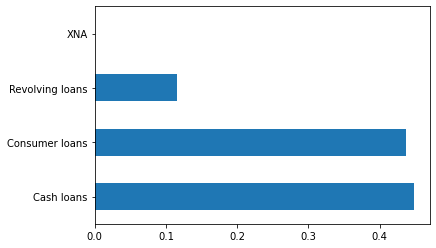

In [34]:
df0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- Cash loan applicants are the highest and consumer loan applicants are also not far behind.

In [36]:
#Lets do a univariate analysis on the column NAME_CONTRACT_STATUS
df0.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

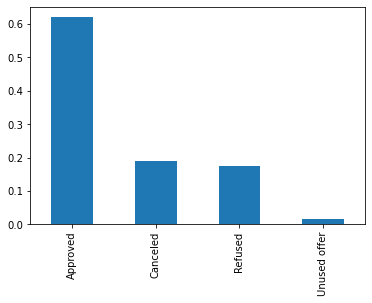

In [37]:
df0.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

- Almost 62% of the application shows approved amongst the applicants.
- Cancelled and refused applications percentage looks almost similar.  

In [43]:
#Lets do a univariate analysis on the column NAME_CLIENT_TYPE
df0.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64

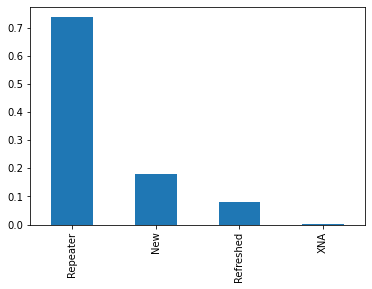

In [44]:
df0.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

- Here almost 75% of the old clients seems to submit the appication again.

Lets do a univariate analysis on some numerical columns.


In [45]:
#Lets do a univariate analysis on the column AMT_CREDIT.
df0.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [46]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df0.AMT_CREDIT= df0.AMT_CREDIT.abs()

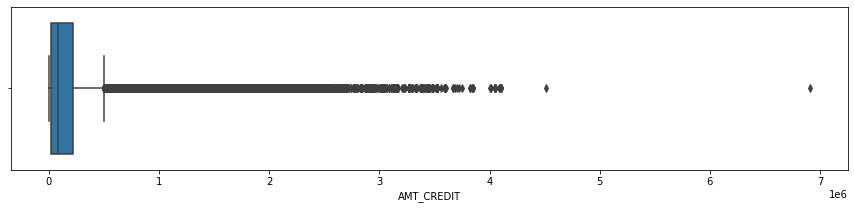

In [54]:
plt.figure(figsize=[15,3])
sns.boxplot(df0.AMT_CREDIT)
plt.show()

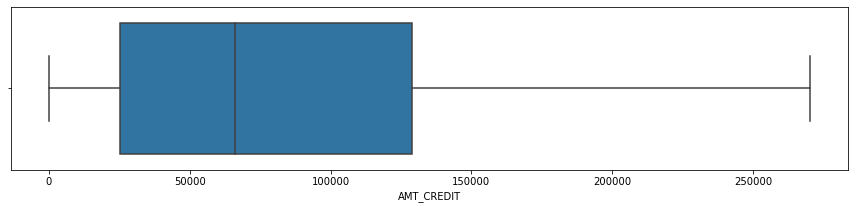

In [55]:
#taking quantile till 0.8 to generate a clear and more meaningful insight.
plt.figure(figsize=[15,3])
sns.boxplot(df0.AMT_CREDIT.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]))
plt.show()

- Almost 80% of the people are within the range of 2.75L loan amount.
- Among these 80% of the population, 50% of the people lie within the range of 25k to 1.25L loan amount.

In [57]:
#Lets do a univariate analysis on the column AMT_APPLICATION.
df0.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [58]:
#Just to avoid the repercussions if there is any negative values entered by mistake.
df0.AMT_APPLICATION= df0.AMT_APPLICATION.abs()

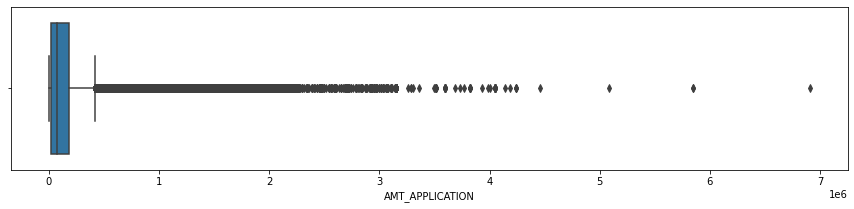

In [59]:
plt.figure(figsize=[15,3])
sns.boxplot(df0.AMT_APPLICATION)
plt.show()

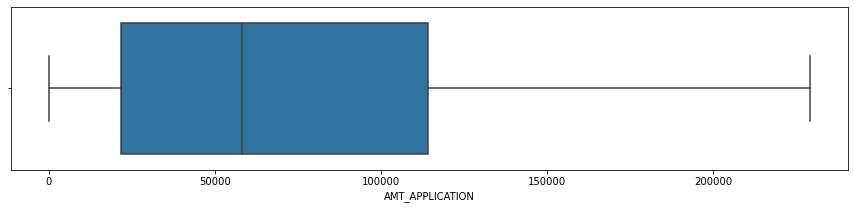

In [60]:
#taking quantile till 0.8 to generate a clear and more meaningful insight.
plt.figure(figsize=[15,3])
sns.boxplot(df0.AMT_APPLICATION.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]))
plt.show()

- Almost 80% of the people have requested for a loan amount lesser than 2.5L.
- Among these 80% of the population, 50% of the people are those who requested for a loan amount within the range of 25k to 1.20L.

Here on, I will do some of the bivariate analysis based on our target column i.e. NAME_CONTRACT_TYPE and analyse the results on the basis of some plots.

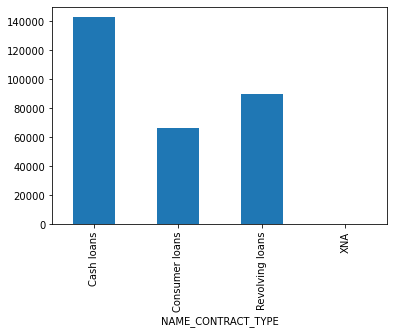

In [64]:
# lets plot a barplot between NAME_CONTRACT_TYPE and AMT_CREDIT.
df0.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].median().plot.bar()
plt.show()

- It reflects, one who has taken cash loans have often been credited with a significantly higher loan amount.

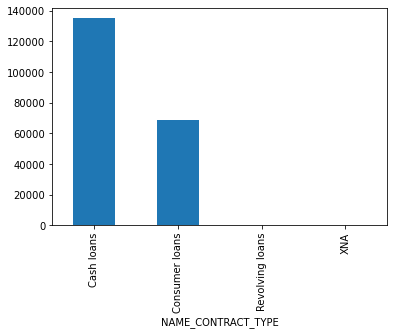

In [65]:
# lets plot a barplot between NAME_CONTRACT_TYPE and AMT_APPLICATION.
df0.groupby('NAME_CONTRACT_TYPE')['AMT_APPLICATION'].median().plot.bar()
plt.show()

- Again, people requesting cash loans tend to request for a significantly higher amount.
- Negligible requests are made for revolving loans.

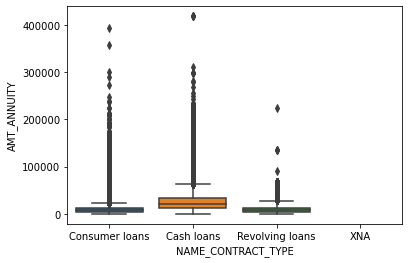

In [88]:
#Lets plot a box plot of  NAME_CONTRACT_TYPE w.r.t. to AMT_ANNUITY.
#Just to avoid the repercussions if there is any negative values entered by mistake.
df0.AMT_ANNUITY= df0.AMT_ANNUITY.abs()
sns.boxplot(data= df0, x= 'NAME_CONTRACT_TYPE', y= 'AMT_ANNUITY')
plt.show()

- Again as expected, we can conclude that annuity for cash loan seems to be on significantly higher side.

### We will now merge both the table doing inner join based on the column SK_ID_CURR and try to figure out the insights based on original target column i.e. TARGET column from the table application_data.csv.

In [90]:
df1 = pd.merge(df, df0, on='SK_ID_CURR', how='inner', indicator=True)
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age_group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,_merge
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,both
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,both
2,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,both
3,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer ele

In [91]:
df1.shape

(1413701, 100)

##### Lets do some bivariate analysis based on TARGET column in the dataframe df1.

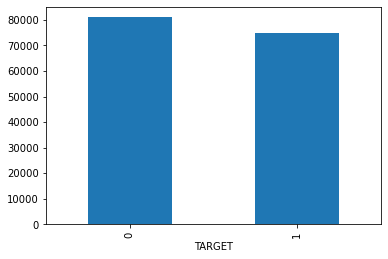

In [95]:
df1.groupby('TARGET')['AMT_CREDIT_y'].median().plot.bar()
plt.show()

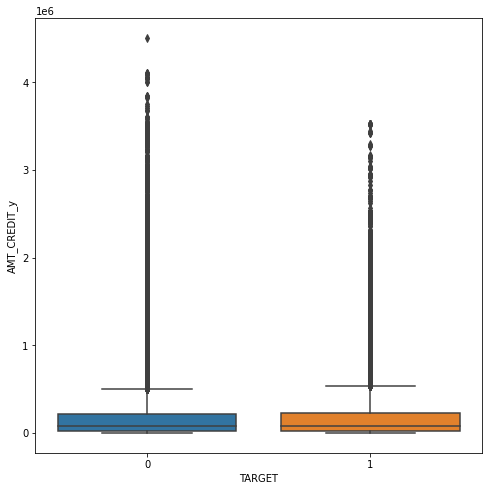

In [97]:
# Lets plot a box plot of AMT_CREDIT for TARGET.
plt.figure(figsize=[8,8])
sns.boxplot(data= df1, x= 'TARGET', y= 'AMT_CREDIT_y')
plt.show()

- Not much of an insight to draw from a boxplot but, if we look over the barplot, we can certainly say an applicant is less likely to default in case he has applied for a credit within the highest range.

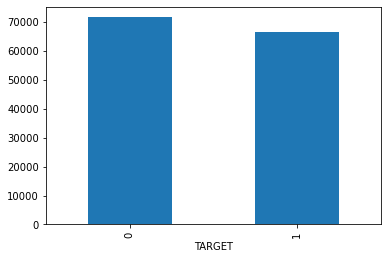

In [98]:

df1.groupby('TARGET')['AMT_APPLICATION'].median().plot.bar()
plt.show()

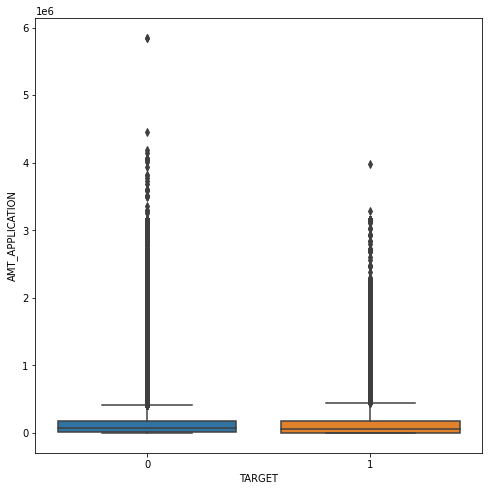

In [99]:
# Lets plot a box plot of AMT_APPLICATION for TARGET.
plt.figure(figsize=[8,8])
sns.boxplot(data= df1, x= 'TARGET', y= 'AMT_APPLICATION')
plt.show()

- Again a very similar insight for what we got for AMT_CREDIT_Y column.

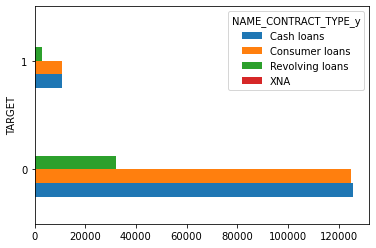

In [100]:
#Lets now plot a barplot between our TARGET column and NAME_EDUCATION_TYPE_y column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df1['NAME_CONTRACT_TYPE_y']).plot.barh()
plt.show()

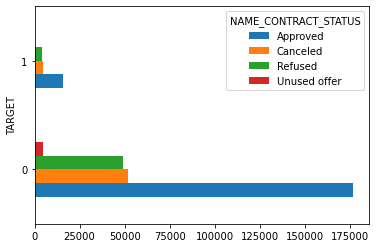

In [101]:
#Lets now plot a barplot between our TARGET column and NAME_CONTRACT_STATUS column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df1['NAME_CONTRACT_STATUS']).plot.barh()
plt.show()

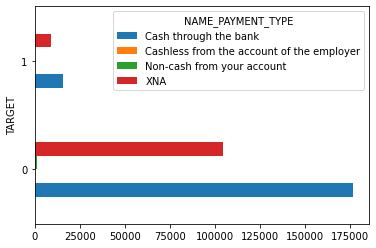

In [102]:
#Lets now plot a barplot between our TARGET column and NAME_PAYMENT_TYPE column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df1['NAME_PAYMENT_TYPE']).plot.barh()
plt.show()

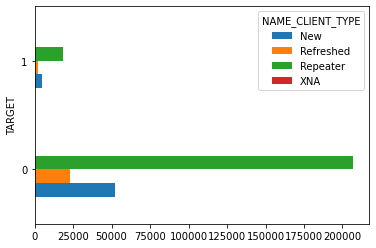

In [103]:
#Lets now plot a barplot between our TARGET column and NAME_CLIENT_TYPE column to observe the trends they are following.
pd.crosstab(index=df['TARGET'], columns=df1['NAME_CLIENT_TYPE']).plot.barh()
plt.show()

## THE END